# Modelos Boosting

En este proyecto deberás construir tres modelos de Machine Learning de ensambles secuenciales para determinar si una persona padece o no una cardiopatía, a partir de los datos.
La base de datos se compone de tres archivos: processed_cleveland.csv, processed_hungarian.csv y processed_switzerland.csv, cada uno representa muestras adquiridas de diferentes clínicas. Los atributos de la base de datos son:

- age: Edad del sujeto en años

- sex: Sexo (1 Hombre, 0 Mujer)

- cp: Tipo de dolor torácico

    a. Valor 1: angina típica

    b. Valor 2: angina atípica

    c. Valor 3: dolor no anginoso

    d. Valor 4: asintomático

- trestbps: Presión arterial en reposo (en mm Hg al ingreso en el hospital)

- chol: Colesterol sérico en mg/dl

- fbs: (glucemia en ayunas > 120 mg/dl) (1 = verdadero; 0 = falso)

- restecg: Medición electrocardiográfica en reposo (0 = normal, 1 = presenta anomalía de la onda ST-T, 2 = muestra hipertrofia ventricular izquierda probable o definida según los criterios de Estes)

- thalach: Frecuencia cardiaca máxima alcanzada

- exang: Angina inducida por ejercicio (1 = sí; 0 = no)

- oldpeak: Depresión del ST inducida por el ejercicio en relación con el reposo

- slope: La pendiente del segmento ST de ejercicio máximo

    a. Valor 1: pendiente ascendente

    b. Valor 2: plano

    c. Valor 3: pendiente descendente

- ca: Número de vasos mayores (0-3) coloreados por la flouroscopia

- thal: 3 = normal; 6 = defecto fijo; 7 = defecto reversible

- num: Diagnóstico de cardiopatía (estado de la enfermedad angiográfica)

    a. Valor 0: < 50% estrechamiento del diámetro

    b. Valor 1: > 50% de estrechamiento del diámetro

El atributo num será la variable objetivo (0 sin enfermedad, 1 con enfermedad)


### Actividad 1

Carga los datos de los tres archivos unidos en un DataFrame, y prepáralos considerando las siguientes etapas:

a. asigna a la variable objetivo num un cero cuando su valor es cero, y un 1 en otro caso. Muestra la cantidad de valores ausente por atributo. Procésalos considerando los siguientes criterios:

- i. si el atributo presenta un porcentaje de valores ausentes mayor a 25%, entonces descartamos ese atributo.

- ii. para los atributos con valores ausentes menores al 25% se deben rellenar con el valor promedio del atributo de acuerdo a la clase, es decir, los valores ausentes para los cuales num=0 se deben rellenar con el promedio de los valores presentes para los cuales num=0.

- iii. Para las variables categóricas, los valores a asignar (promedio) deben ser aproximados al valor entero más cercano.

b. Construye variables dummies para las variables discretas con tres o más categorías.

c. Realiza un análisis descriptivo por variable visualizando histogramas y gráficos de barra según corresponda. Construye una matriz de correlaciones con un heatmap, para las variables continuas. Plantea tus observaciones y conclusiones


In [121]:
# Bibliotecas Comunes
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import mode

#Metricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import classification_report

# Identificación de outliers
from sklearn.ensemble import IsolationForest

# Evaluacion de Modelos y Seleccion de Features
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Guardar modelos entrenados
from joblib import dump

In [14]:
df_header = pd.read_csv("feature_names.csv", delimiter=",", encoding="utf-8", header=None)
features_names = df_header[0].tolist()

In [22]:
df_01 = pd.read_csv("processed.cleveland.data", delimiter=",", encoding="utf-8", na_values=["?"] , header=None)
df_01

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [23]:
df_02 = pd.read_csv("processed.hungarian.data", delimiter=",", encoding="utf-8", na_values=["?"] , header=None)
df_02

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331.0,0.0,0.0,94.0,1.0,2.5,NaN,NaN,NaN,1
290,54,0,3,130.0,294.0,0.0,1.0,100.0,1.0,0.0,2.0,NaN,NaN,1
291,56,1,4,155.0,342.0,1.0,0.0,150.0,1.0,3.0,2.0,NaN,NaN,1
292,58,0,2,180.0,393.0,0.0,0.0,110.0,1.0,1.0,2.0,NaN,7.0,1


In [24]:
df_03 = pd.read_csv("processed.switzerland.data", delimiter=",", encoding="utf-8", na_values=["?"] , header=None)
df_03

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,32,1,1,95.0,0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1
1,34,1,4,115.0,0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1
2,35,1,4,NaN,0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,3
3,36,1,4,110.0,0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1
4,38,0,4,105.0,0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,115.0,0,0.0,1.0,92.0,1.0,0.0,2.0,NaN,7.0,1
119,70,1,4,140.0,0,1.0,0.0,157.0,1.0,2.0,2.0,NaN,7.0,3
120,72,1,3,160.0,0,NaN,2.0,114.0,0.0,1.6,2.0,2.0,NaN,0
121,73,0,3,160.0,0,0.0,1.0,121.0,0.0,0.0,1.0,NaN,3.0,1


In [25]:
df_concat_01_02 = pd.concat([df_01, df_02], ignore_index=True)
df_concat_01_02_03 = pd.concat([df_concat_01_02, df_03], ignore_index=True)
df_concat_01_02_03.columns = features_names
df = df_concat_01_02_03
df

,age,sex,cp,threstbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,70.0,1.0,4.0,115.0,0.0,0.0,1.0,92.0,1.0,0.0,2.0,NaN,7.0,1
716,70.0,1.0,4.0,140.0,0.0,1.0,0.0,157.0,1.0,2.0,2.0,NaN,7.0,3
717,72.0,1.0,3.0,160.0,0.0,NaN,2.0,114.0,0.0,1.6,2.0,2.0,NaN,0
718,73.0,0.0,3.0,160.0,0.0,0.0,1.0,121.0,0.0,0.0,1.0,NaN,3.0,1


In [76]:
# Los valores de colesterol igual a 0 no son biologicamente posible y deben ser cambiados por valores nulos nan
df["chol"] = df["chol"].apply(lambda x: np.nan if x == 0 else x)

In [92]:
df

,age,sex,cp,threstbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,70.0,1.0,4.0,115.0,NaN,0.0,1.0,92.0,1.0,0.0,2.0,NaN,7.0,1
716,70.0,1.0,4.0,140.0,NaN,1.0,0.0,157.0,1.0,2.0,2.0,NaN,7.0,3
717,72.0,1.0,3.0,160.0,NaN,NaN,2.0,114.0,0.0,1.6,2.0,2.0,NaN,0
718,73.0,0.0,3.0,160.0,NaN,0.0,1.0,121.0,0.0,0.0,1.0,NaN,3.0,1


In [93]:
# Tipos de Datos y No Nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        720 non-null    float64
 1   sex        720 non-null    float64
 2   cp         720 non-null    float64
 3   threstbps  717 non-null    float64
 4   chol       574 non-null    float64
 5   fbs        637 non-null    float64
 6   restecg    718 non-null    float64
 7   thalach    718 non-null    float64
 8   exang      718 non-null    float64
 9   oldpeak    714 non-null    float64
 10  slope      513 non-null    float64
 11  ca         307 non-null    float64
 12  thal       400 non-null    float64
 13  num        720 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 78.9 KB


In [94]:
# Valores Nulos
missing_values=df.apply(lambda x: sum(x.isnull()),axis=0)
print(missing_values)

age            0
sex            0
cp             0
threstbps      3
chol         146
fbs           83
restecg        2
thalach        2
exang          2
oldpeak        6
slope        207
ca           413
thal         320
num            0
dtype: int64


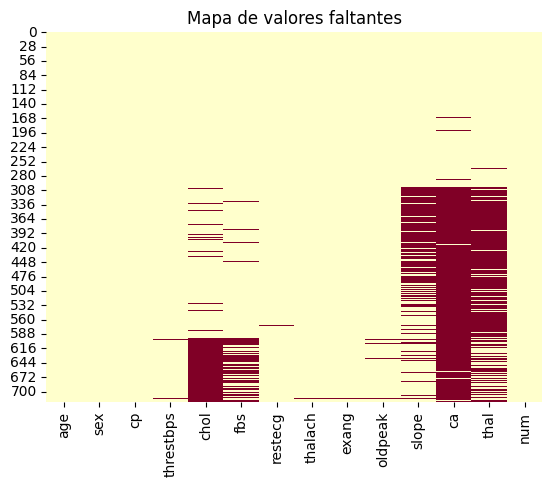

In [95]:
sns.heatmap(df.isnull(), cbar=False, cmap="YlOrRd")
plt.title("Mapa de valores faltantes")
plt.show()

In [97]:
def df_format(df:pd.DataFrame, column_target:str, columns_continuous:list, columns_categorical:list, columns_dummies:list) -> pd.DataFrame:

    df_ = df.copy()

    # Formateando columna objetivo
    df_[column_target] = df_[column_target].apply(lambda x: 0 if x == 0 else 1)

    # Máscara de filas de columna objetivo igual a 0 y 1
    mask_num_0 = df_[column_target] == 0
    mask_num_1 = df_[column_target] == 1

    # Dataframe con valores medios de cada columna según etiqueta de columna objetivo
    df_mean = pd.DataFrame(columns=df_.columns).reindex(range(2))

    # Completando datos y descartando datos
    deleted_columns = []

    for column in df_.columns:

        if column == column_target:
            continue

        missing_values = df_[column].isna().sum()
        number_rows = len(df_[column])
        mask_nan = df_[column].isnull()
        
        if missing_values > number_rows*0.25:
            deleted_columns.append(column)

        else:

            mean_column_num_0 = df_.loc[mask_num_0, column].mean()
            mean_column_num_1 = df_.loc[mask_num_1, column].mean()

            mask_num_0_nan = mask_num_0 & mask_nan
            mask_num_1_nan = mask_num_1 & mask_nan

            if column in columns_continuous:

                df_.loc[mask_num_0_nan, column] = mean_column_num_0
                df_.loc[mask_num_1_nan, column] = mean_column_num_1

                df_mean.loc[0, column] = mean_column_num_0
                df_mean.loc[1, column] = mean_column_num_1

            if column in columns_categorical:

                df_.loc[mask_num_0_nan, column] = round(mean_column_num_0)
                df_.loc[mask_num_1_nan, column] = round(mean_column_num_1)

                df_mean.loc[0, column] = round(mean_column_num_0)
                df_mean.loc[1, column] = round(mean_column_num_1)

    # Borrar columnas que no cumplen condiciones de valores nulos
    df_.drop(columns=deleted_columns, inplace=True)

    # Aplicar dummies
    for column in df_.columns:

        if column in columns_dummies:
            df_ = pd.get_dummies(df_, columns=[column])

    return df_, df_mean


In [98]:
feature_target = "num"
features_continuous = ["age", "threstbps", "chol", "thalach", "oldpeak"]
features_categorical = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
features_to_dummies = ["cp", "restecg", "slope", "thal"]

df_formated, df_mean = df_format(df, feature_target, features_continuous, features_categorical, features_to_dummies)
df_formated

,age,sex,threstbps,chol,fbs,thalach,exang,oldpeak,num,cp_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0
0,63.0,1.0,145.0,233.000000,1.0,150.0,0.0,2.3,0,True,False,False,False,False,False,True
1,67.0,1.0,160.0,286.000000,0.0,108.0,1.0,1.5,1,False,False,False,True,False,False,True
2,67.0,1.0,120.0,229.000000,0.0,129.0,1.0,2.6,1,False,False,False,True,False,False,True
3,37.0,1.0,130.0,250.000000,0.0,187.0,0.0,3.5,0,False,False,True,False,True,False,False
4,41.0,0.0,130.0,204.000000,0.0,172.0,0.0,1.4,0,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,70.0,1.0,115.0,258.929167,0.0,92.0,1.0,0.0,1,False,False,False,True,False,True,False
716,70.0,1.0,140.0,258.929167,1.0,157.0,1.0,2.0,1,False,False,False,True,True,False,False
717,72.0,1.0,160.0,241.272455,0.0,114.0,0.0,1.6,0,False,False,True,False,False,False,True
718,73.0,0.0,160.0,258.929167,0.0,121.0,0.0,0.0,1,False,False,True,False,False,True,False


In [99]:
df_mean

,age,sex,cp,threstbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,49.658333,1,3,129.913649,241.272455,0,1,150.927577,0,0.391111,NaN,NaN,NaN,NaN
1,54.119444,1,4,133.701117,258.929167,0,1,130.203343,1,1.194915,NaN,NaN,NaN,NaN


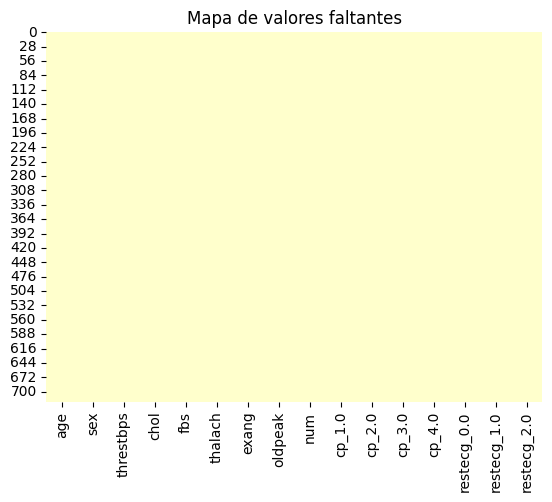

In [100]:
sns.heatmap(df_formated.isnull(), cbar=False, cmap="YlOrRd")
plt.title("Mapa de valores faltantes")
plt.show()

In [101]:
# Método para graficar
def plot_df_columns(
    df: pd.DataFrame,
    tipo: str = "histplot",
    figsize=(14, 8),
    kde: bool = False,
    bins_list=None,
    stat: str = "count"
):
    """
    Grafica todas las columnas numéricas de un DataFrame en subplots.
    
    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame con los datos.
    tipo : {"hisplot","histplot","boxplot"}
        Tipo de gráfico por subplot. Se acepta el typo "hisplot" (histplot).
    figsize : tuple
        Tamaño de la figura en pulgadas (ancho, alto) para plt.subplots.
    kde : bool
        Si True, añade curva KDE en histplot. Ignorado en boxplot.
    bins_list : list | None
        Lista con los bins a usar para cada columna (solo histplot).
        - Puede contener enteros, secuencias de bordes, o None.
        - Si la lista es más corta que el número de columnas, las
          faltantes usarán "auto".
    stat : {"count","frequency","density","probability"}
        Estadístico para histplot (ignorado en boxplot).
    """
    # Normalizar tipo
    tipo = (tipo or "").lower().strip()
    if tipo == "hisplot":  # aceptar el typo pedido
        tipo = "histplot"
    if tipo not in {"histplot", "boxplot"}:
        raise ValueError('tipo debe ser "hisplot"/"histplot" o "boxplot".')

    # Solo columnas numéricas (ambos gráficos requieren datos numéricos)
    cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if len(cols) == 0:
        raise ValueError("No hay columnas numéricas para graficar.")

    n = len(cols)
    # Distribuir subplots en una cuadrícula "cuadrada"
    ncols = math.ceil(math.sqrt(n))
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = np.array(axes).reshape(-1) if isinstance(axes, np.ndarray) else np.array([axes])

    # Preparar bins por columna si corresponde
    if bins_list is None:
        bins_list = []
    # Asegurar longitud
    if len(bins_list) < n:
        bins_list = list(bins_list) + ["auto"] * (n - len(bins_list))

    for i, col in enumerate(cols):
        ax = axes[i]
        serie = df[col].dropna()

        if tipo == "histplot":
            bins = bins_list[i]
            sns.histplot(serie, bins=bins, kde=kde, stat=stat, ax=ax)
        else:  # boxplot
            sns.boxplot(x=serie, ax=ax)

        ax.set_title(str(col))

    # Ocultar axes no usados si la rejilla es más grande que n
    for j in range(n, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

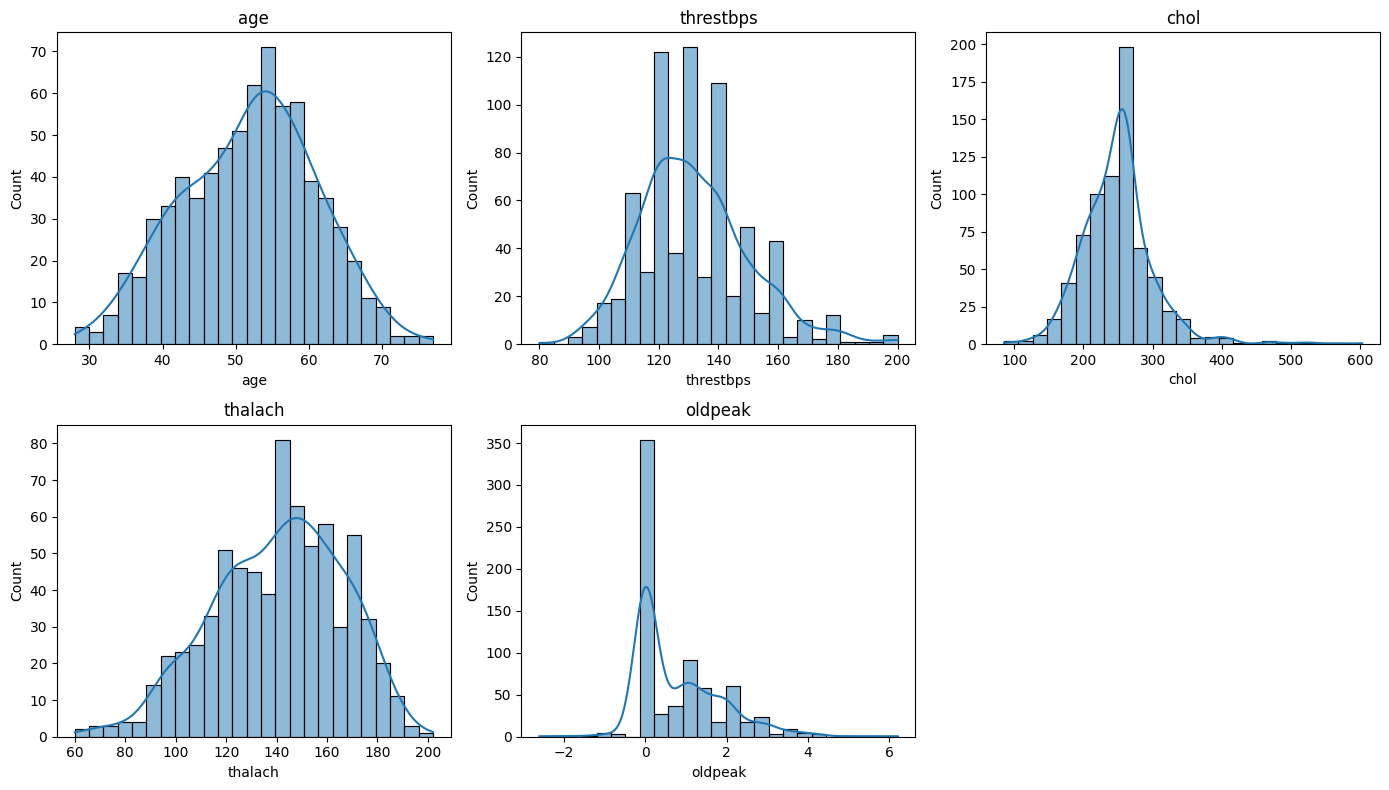

In [102]:
# Graficando histogramas para columnas numericas conitnuas (No categóricas)

plot_df_columns(df= df_formated[features_continuous], tipo= "histplot", figsize=(14, 8), kde= True, bins_list=[25, 25, 25, 25, 25], stat= "count")

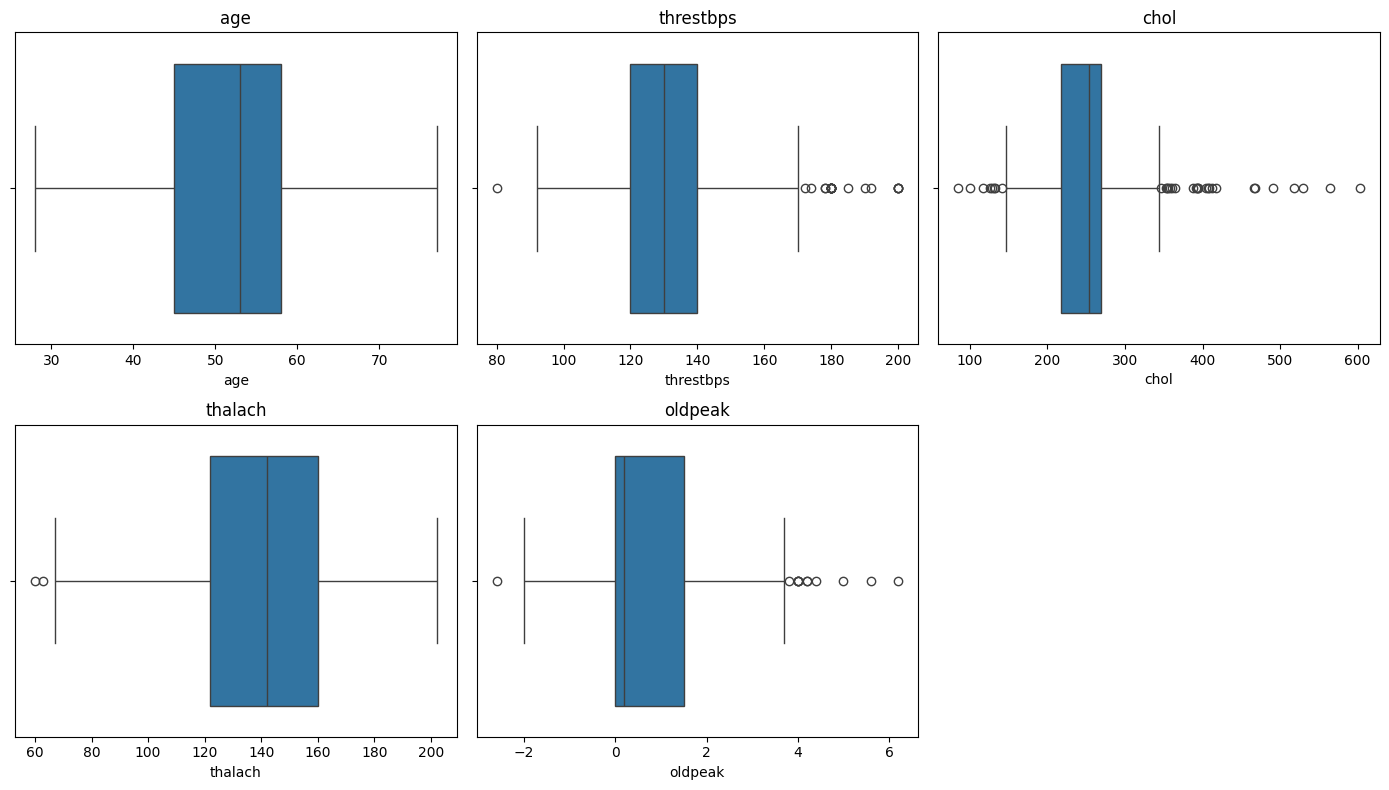

In [103]:
# Graficando boxplot para columnas numericas conitnuas (No categóricas)

plot_df_columns(df= df_formated[features_continuous], tipo= "boxplot", figsize=(14, 8), kde= True, bins_list=[20, 20, 20, 20, 20], stat= "count")

In [104]:
# Descripciones estadísticas generales de cada columna
df_formated.describe()

,age,sex,threstbps,chol,fbs,thalach,exang,oldpeak,num
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,51.888889,0.738889,131.807383,250.100811,0.097222,140.565460,0.337500,0.793013,0.500000
std,9.193720,0.439546,18.491039,53.534447,0.296466,25.617307,0.473186,1.063139,0.500348
min,28.000000,0.000000,80.000000,85.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,45.000000,0.000000,120.000000,218.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,53.000000,1.000000,130.000000,254.000000,0.000000,142.000000,0.000000,0.200000,0.500000
75%,58.000000,1.000000,140.000000,269.000000,0.000000,160.000000,1.000000,1.500000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [105]:
def df_outliers_analysis(df:pd.DataFrame, columns_to_analize:list):

    # Copia de trabajo
    df_ = df.copy()

    # Configurar Isolation Forest
    iso = IsolationForest(contamination=0.05, random_state=42)

    # Detectar outliers columna por columna
    outlier_flags = {}
    for col in columns_to_analize:
        values = df[[col]].dropna()
        preds = iso.fit_predict(values)  # -1 = outlier, 1 = normal
        mask = pd.Series(preds, index=values.index).map({1: False, -1: True})
        outlier_flags[col] = mask

    # ---------------------------------------
    # Graficar matriz de histogramas
    
    n_cols = 3
    n_rows = int(np.ceil(len(columns_to_analize) / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(columns_to_analize):
        ax = axes[i]

        # Histogram normales
        sns.histplot(df[col], bins=30, kde=False, color="skyblue", ax=ax, label="Normal")

        # Superponer outliers en rojo
        out_vals = df.loc[outlier_flags[col], col]
        sns.histplot(out_vals, bins=30, kde=False, color="red", ax=ax, label="Outliers")

        ax.set_title(f"Histograma con Outliers - {col}")
        ax.legend()

    # Quitar ejes vacíos si sobran
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    return pd.DataFrame(outlier_flags)

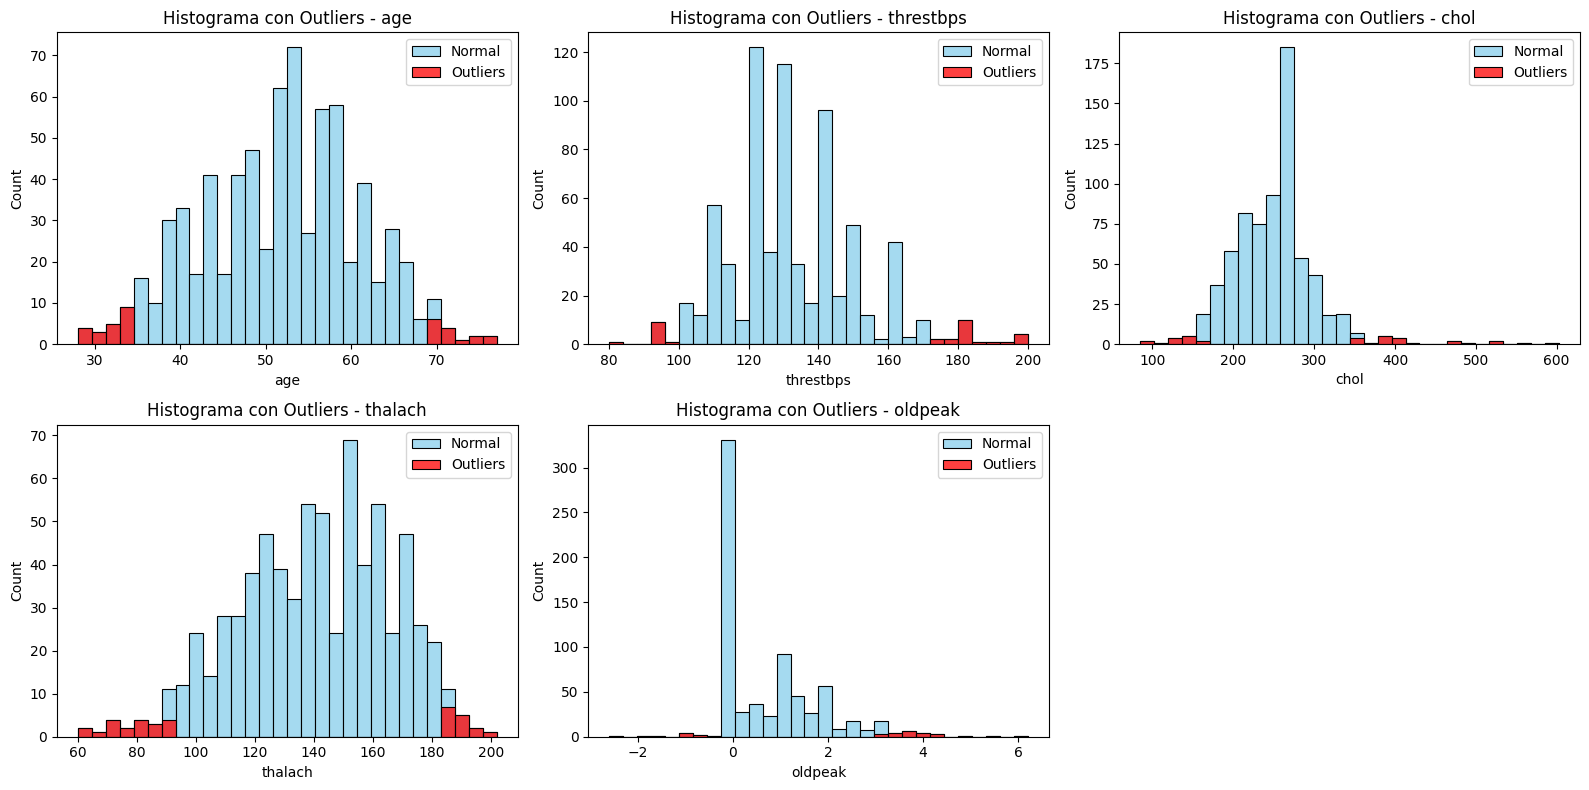

In [106]:
# Graficos Outliers
df_outliers = df_outliers_analysis(df=df_formated, columns_to_analize=features_continuous)

In [107]:
# No eliminaremos los valores outliers y los utilizaremos en el entrenamiento

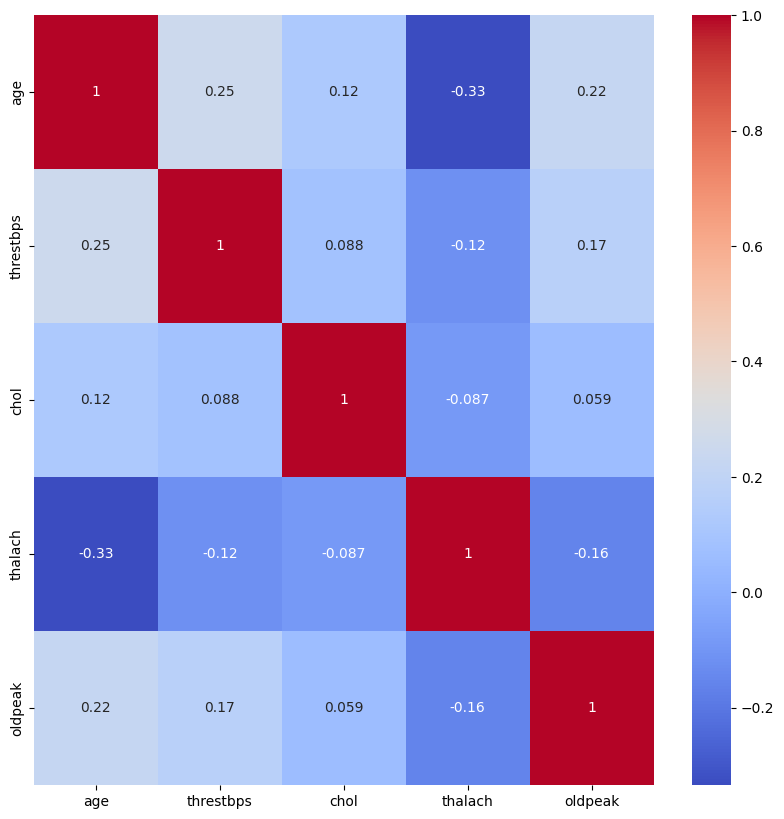

In [108]:
# Matriz de Correlacion de Pearson para relacionar variables numericas, no utilizaremos chi-cuadrado o ANOVA 
# Graficar Correlaciones
plt.figure(figsize=(10,10))
sns.heatmap(df_formated[features_continuous].corr(method="pearson"), annot=True, cmap='coolwarm')
plt.show()

### Actividad 2

Divide la muestra en entrenamiento y test (33%), y con ello:
- a. entrena un modelo de ensamble secuencial AdaBoost
- b. entrena un modelo de ensamble secuencial Gradient Boosting
- c. entrena un modelo de ensamble secuencial XGBoosting
Para cada uno, utiliza hiper parámetros por defecto y muestra su desempeño usando las métricas adecuadas. Comenta.

In [109]:
# Generar valores de X
X = df_formated.drop(feature_target, axis=1)
X

,age,sex,threstbps,chol,fbs,thalach,exang,oldpeak,cp_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0
0,63.0,1.0,145.0,233.000000,1.0,150.0,0.0,2.3,True,False,False,False,False,False,True
1,67.0,1.0,160.0,286.000000,0.0,108.0,1.0,1.5,False,False,False,True,False,False,True
2,67.0,1.0,120.0,229.000000,0.0,129.0,1.0,2.6,False,False,False,True,False,False,True
3,37.0,1.0,130.0,250.000000,0.0,187.0,0.0,3.5,False,False,True,False,True,False,False
4,41.0,0.0,130.0,204.000000,0.0,172.0,0.0,1.4,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,70.0,1.0,115.0,258.929167,0.0,92.0,1.0,0.0,False,False,False,True,False,True,False
716,70.0,1.0,140.0,258.929167,1.0,157.0,1.0,2.0,False,False,False,True,True,False,False
717,72.0,1.0,160.0,241.272455,0.0,114.0,0.0,1.6,False,False,True,False,False,False,True
718,73.0,0.0,160.0,258.929167,0.0,121.0,0.0,0.0,False,False,True,False,False,True,False


In [111]:
# Generar valores de y
y = df_formated[[feature_target]]
y

,num
0,0
1,1
2,1
3,0
4,0
...,...
715,1
716,1
717,0
718,1


In [112]:
# Generar Datos de Entrenamiento y Testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [113]:
X_train

,age,sex,threstbps,chol,fbs,thalach,exang,oldpeak,cp_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0
513,49.0,1.0,115.0,265.000000,0.0,175.0,0.0,0.0,False,False,True,False,True,False,False
649,55.0,1.0,115.0,258.929167,0.0,155.0,0.0,0.1,False,False,False,True,True,False,False
83,68.0,1.0,180.0,274.000000,1.0,150.0,1.0,1.6,False,False,True,False,False,False,True
218,64.0,0.0,130.0,303.000000,0.0,122.0,0.0,2.0,False,False,False,True,True,False,False
485,59.0,1.0,140.0,241.272455,0.0,140.0,0.0,0.0,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,67.0,1.0,125.0,254.000000,1.0,163.0,0.0,0.2,False,False,False,True,True,False,False
106,59.0,1.0,140.0,177.000000,0.0,162.0,1.0,0.0,False,False,False,True,True,False,False
270,61.0,1.0,140.0,207.000000,0.0,138.0,1.0,1.9,False,False,False,True,False,False,True
435,53.0,0.0,140.0,216.000000,0.0,142.0,1.0,2.0,False,True,False,False,True,False,False


In [114]:
y_train

,num
513,1
649,1
83,1
218,0
485,0
...,...
71,1
106,1
270,1
435,0


In [115]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_train = y_train.to_numpy().ravel()

In [168]:
# Funciones para evaluar métricas

def model_evaluation_regressor(y_test, y_pred, model_name:str):
    dict_results = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }
    df = pd.DataFrame(dict_results, index=[f"{model_name}"])
    df.index.name = "Model"
    return df

def model_evaluation_classifier(y_test, y_pred, y_prob, model_name:str):
    dict_results = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob)
    }

    df = pd.DataFrame(dict_results, index=[f"{model_name}"])
    df.index.name = "Model"
    return df

def shows_roc_curve(y_test, y_prob):
    # Graficar curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.3f})")
    plt.plot([0,1], [0,1], 'k--', label="Línea aleatoria")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

def show_metrics_models(df:pd.DataFrame):
    df.plot(kind='bar', figsize=(25,10))     # o df.plot.bar()
    plt.title("Modelos vs Métricas")
    plt.xlabel("Modelo")
    plt.ylabel("Valor Métrica")
    plt.xticks(rotation=0)  # etiquetas verticales (0 = horizontales)
    plt.legend(title="Métricas")
    plt.show()

def shows_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred: No', 'Pred: Sí'],
            yticklabels=['Real: No', 'Real: Sí'])
    plt.xlabel("Predicción del modelo")
    plt.ylabel("Valor real")
    plt.title("Matriz de Confusión")
    plt.show()

    print("Descripción Matriz de Confusión")
    print("---------------------------------")
    print(f"Falsos Positivos: {cm[0][1]}")
    print(f"Falsos Negativos: {cm[1][0]}")
    print(f"Verdaderos Positivos: {cm[1][1]}")
    print(f"Verdaderos Negativos: {cm[0][0]}")


In [130]:
# AdaBoostClassifier

# Modelo base
adaboost_clf = AdaBoostClassifier(random_state=42)

# Entrenamiento
adaboost_clf.fit(X_train, y_train)

# Predicción
y_pred_adaboost_clf = adaboost_clf.predict(X_test)
y_prob_adaboost_clf = adaboost_clf.predict_proba(X_test)[:, 1] # probabilidad de la clase positiva

# Evaluacion de desempeño con los datos de predicción
df_results_adaboost_clf = model_evaluation_classifier(y_test, y_pred_adaboost_clf, y_prob_adaboost_clf,"model_adaboost_clf")
df_results_adaboost_clf

,Accuracy,Precision,Recall,F1 Score,AUC
Model,,,,,
model_adaboost_clf,0.848739,0.850877,0.836207,0.843478,0.921354


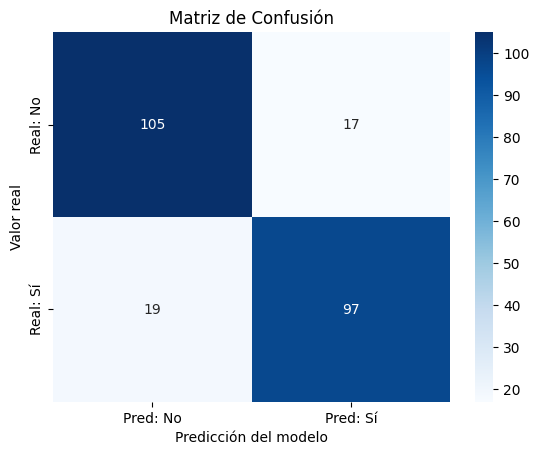

Descripción Matriz de Confusión
---------------------------------
Falsos Positivos: 17
Falsos Negativos: 19
Verdaderos Positivos: 97
Verdaderos Negativos: 105


In [174]:
shows_confusion_matrix(y_test, y_pred_adaboost_clf)

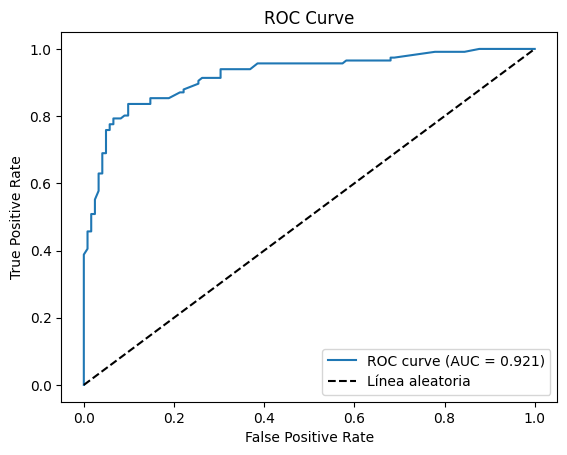

In [170]:
shows_roc_curve(y_test, y_prob_adaboost_clf)

In [131]:
# GradientBoostingClassifier

# Modelo base
gradientboost_clf = GradientBoostingClassifier(random_state=42)

# Entrenamiento
gradientboost_clf.fit(X_train, y_train)

# Predicción
y_pred_gradientboost_clf = gradientboost_clf.predict(X_test)
y_prob_gradientboost_clf = gradientboost_clf.predict_proba(X_test)[:, 1] # probabilidad de la clase positiva

# Evaluacion de desempeño con los datos de predicción
df_results_gradientboost_clf = model_evaluation_classifier(y_test, y_pred_gradientboost_clf, y_prob_gradientboost_clf, "model_gradientboost_clf")
df_results_gradientboost_clf

,Accuracy,Precision,Recall,F1 Score,AUC
Model,,,,,
model_gradientboost_clf,0.827731,0.804878,0.853448,0.828452,0.910331


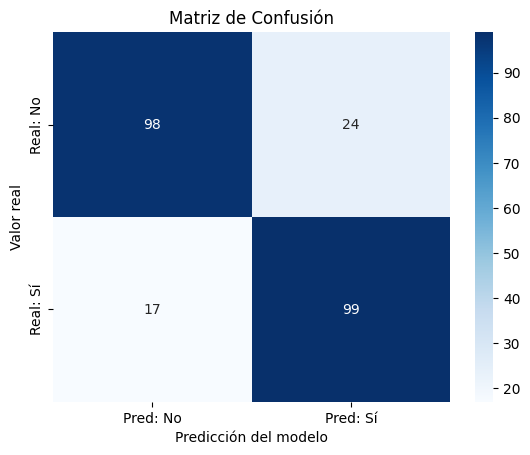

Descripción Matriz de Confusión
---------------------------------
Falsos Positivos: 24
Falsos Negativos: 17
Verdaderos Positivos: 99
Verdaderos Negativos: 98


In [175]:
shows_confusion_matrix(y_test, y_pred_gradientboost_clf)

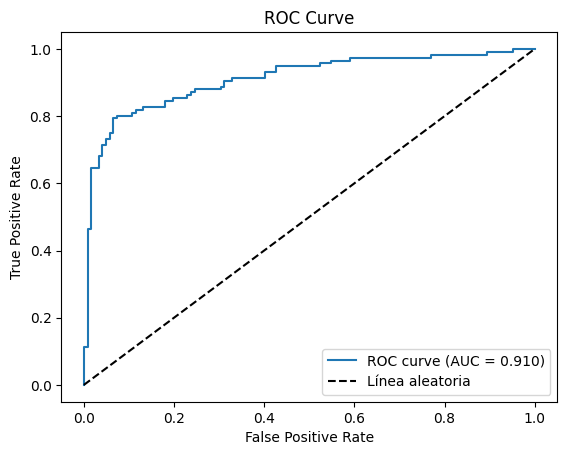

In [171]:
shows_roc_curve(y_test, y_prob_gradientboost_clf)

In [132]:
# XGBClassifier

# Modelo base
xgb_clf = XGBClassifier(random_state=42)

# Entrenamiento
xgb_clf.fit(X_train, y_train)

# Predicción
y_pred_xgb_clf = xgb_clf.predict(X_test)
y_prob_xgb_clf = xgb_clf.predict_proba(X_test)[:, 1] # probabilidad de la clase positiva


# Evaluacion de desempeño con los datos de predicción
df_results_xgb_clf = model_evaluation_classifier(y_test, y_pred_xgb_clf, y_prob_xgb_clf,"model_xgb_clf")
df_results_xgb_clf

,Accuracy,Precision,Recall,F1 Score,AUC
Model,,,,,
model_xgb_clf,0.827731,0.809917,0.844828,0.827004,0.907363


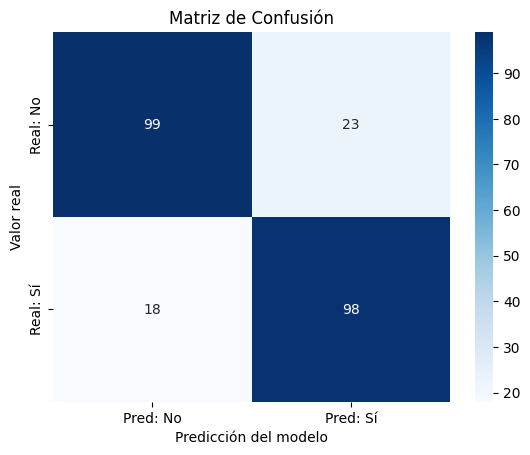

Descripción Matriz de Confusión
---------------------------------
Falsos Positivos: 23
Falsos Negativos: 18
Verdaderos Positivos: 98
Verdaderos Negativos: 99


In [176]:
shows_confusion_matrix(y_test, y_pred_xgb_clf)

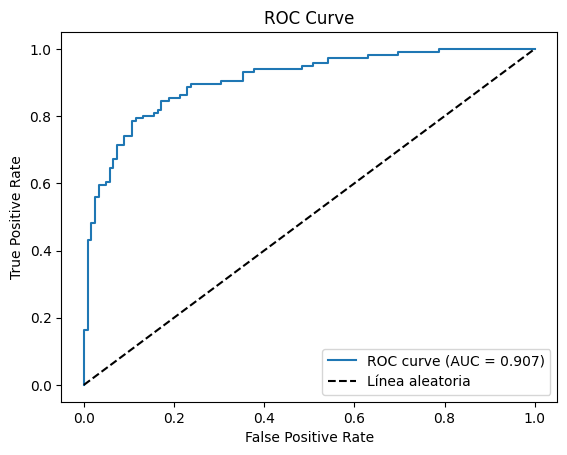

In [172]:
shows_roc_curve(y_test, y_prob_xgb_clf)

In [157]:
df_results_boost_base = pd.concat([df_results_adaboost_clf, df_results_gradientboost_clf, df_results_xgb_clf])
df_results_boost_base

,Accuracy,Precision,Recall,F1 Score,AUC
Model,,,,,
model_adaboost_clf,0.848739,0.850877,0.836207,0.843478,0.921354
model_gradientboost_clf,0.827731,0.804878,0.853448,0.828452,0.910331
model_xgb_clf,0.827731,0.809917,0.844828,0.827004,0.907363


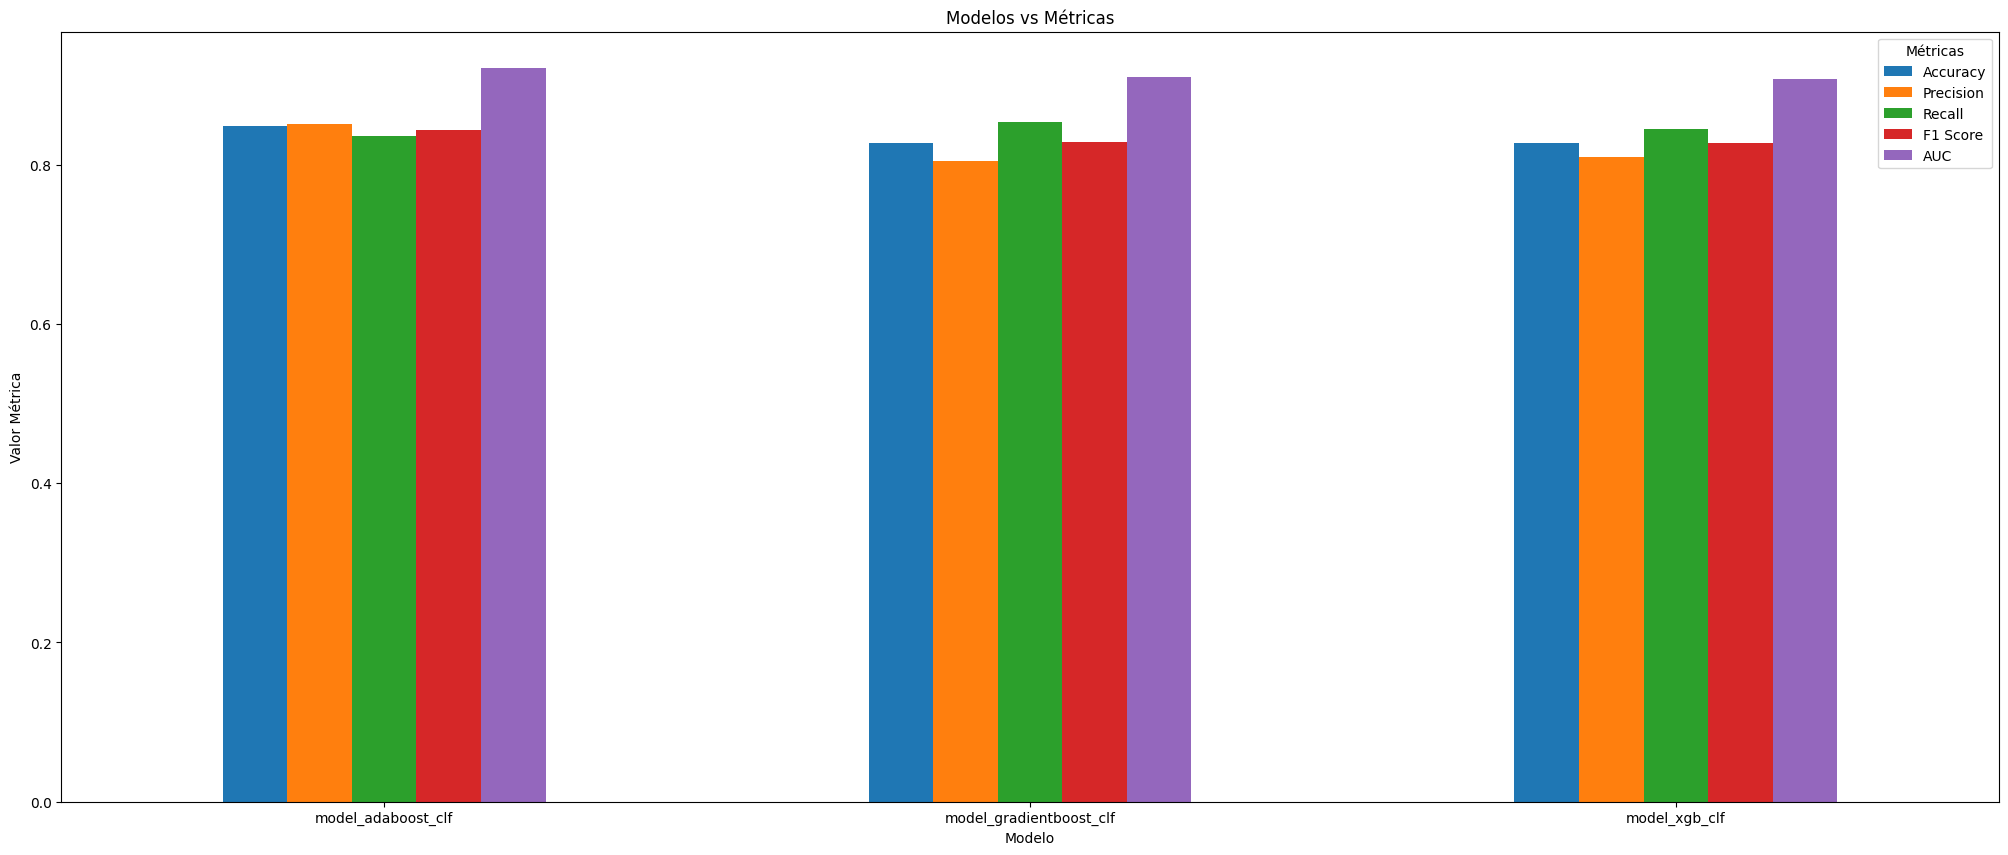

In [165]:
show_metrics_models(df_results_boost_base)

### Actividad 3

Realiza una búsqueda del hiper parámetro para el modelo que resulte tener mejor desempeño (utiliza f1-score para determinarlo). Los valores a buscar para la grilla son:
- a. n_estimators: 20 a 200 con 15 valores
- b. learning_rate: 0.004 a 1.0 con 40 valores
- c. sub_sample: 0.1 a 1.0 con 18 valores

### Actividad 4

Elabora un gráfico con las curvas ROC para cada modelo entrenado, y a partir de ello recomienda alguno de ellos. Justifica la decisión

### Actividad 5

Muestra las variables por nivel de importancia para el mejor modelo, luego de la búsqueda de hiper parámetro. Comenta.

In [194]:
# Parametros de la grilla
param_grid_adaboost_clf = {
    'n_estimators': [20 +12*i for i in range(16)], 
    'learning_rate': [ 0.004 + 0.0249*i for i in range(41)]
}

param_grid_gradientboost_clf = {
    'n_estimators': [20 +12*i for i in range(16)], 
    'learning_rate': [ 0.004 + 0.0249*i for i in range(41)],
    'subsample': [0.1+0.05*i for i in range(19)]
}

param_grid_xgb_clf = {
    'n_estimators': [20 +12*i for i in range(16)], 
    'learning_rate': [ 0.004 + 0.0249*i for i in range(41)],
    'subsample': [0.1+0.05*i for i in range(19)]
}



In [192]:
# Grilla AdaBoostClassifier
grid_adaboost_clf = GridSearchCV(
    estimator= adaboost_clf,
    param_grid= param_grid_adaboost_clf,
    scoring= "f1",
    n_jobs=-1,
    verbose=0
)

# Entrenar grilla.
grid_adaboost_clf.fit(X_train, y_train)

# Mejor Estimador y Parametros
best_adaboost_clf = grid_adaboost_clf.best_estimator_
best_params_adaboost_clf = grid_adaboost_clf.best_params_

# Predecir
y_pred_best_adaboost_clf = best_adaboost_clf.predict(X_test)
y_prob_best_adaboost_clf = best_adaboost_clf.predict_proba(X_test)[:, 1]  # probabilidad de la clase positiva

In [197]:
# Guardando Modelo para posibles usos futuros en archivos .joblib
dump(best_adaboost_clf, 'best_adaboost_clf.joblib')

['best_adaboost_clf.joblib']

In [200]:
# Mejores parametros
print("Mejores parámetros:", best_params_adaboost_clf)

Mejores parámetros: {'learning_rate': 0.30279999999999996, 'n_estimators': 116}


In [213]:
# Importancia de características según modelo: best_adaboost_clf

importances_best_adaboost_clf = pd.Series(best_adaboost_clf.feature_importances_, index=X.columns)
sorted_importances_best_adaboost_clf = importances_best_adaboost_clf.sort_values(ascending=False)
print("\nImportancia de Features según modelo: best_adaboost_clf")
print(sorted_importances_best_adaboost_clf)


Importancia de Features según modelo: best_adaboost_clf
thalach        0.332616
chol           0.218717
cp_4.0         0.123856
oldpeak        0.107445
sex            0.088234
exang          0.075791
age            0.034682
cp_2.0         0.010381
threstbps      0.008275
fbs            0.000000
cp_1.0         0.000000
cp_3.0         0.000000
restecg_0.0    0.000000
restecg_1.0    0.000000
restecg_2.0    0.000000
dtype: float64


In [203]:
# Evaluacion de desempeño con los datos de predicción
df_results_best_adaboost_clf = model_evaluation_classifier(y_test, y_pred_best_adaboost_clf, y_prob_best_adaboost_clf,"model_best_adaboost_clf")
df_results_best_adaboost_clf

,Accuracy,Precision,Recall,F1 Score,AUC
Model,,,,,
model_best_adaboost_clf,0.857143,0.853448,0.853448,0.853448,0.927749


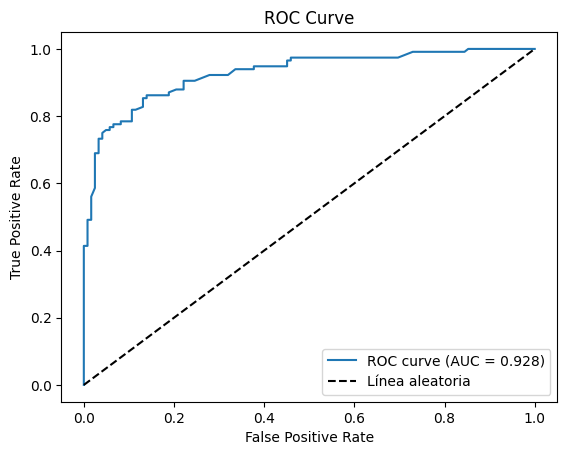

In [209]:
shows_roc_curve(y_test, y_prob_best_adaboost_clf)

In [195]:
# Grilla GradientBoostingClassifier

grid_gradientboost_clf = GridSearchCV(
    estimator= gradientboost_clf,
    param_grid= param_grid_gradientboost_clf,
    scoring= "f1",
    n_jobs=-1,
    verbose=0
)

# Entrenar grilla.
grid_gradientboost_clf.fit(X_train, y_train)

# Mejor Estimador y Parametros
best_gradientboost_clf = grid_gradientboost_clf.best_estimator_
best_params_gradientboost_clf = grid_gradientboost_clf.best_params_

# Predecir
y_pred_best_gradientboost_clf = best_gradientboost_clf.predict(X_test)
y_prob_best_gradientboost_clf = best_gradientboost_clf.predict_proba(X_test)[:, 1]  # probabilidad de la clase positiva

In [198]:
# Guardando Modelo para posibles usos futuros en archivos .joblib
dump(best_gradientboost_clf, 'best_gradientboost_clf.joblib')

['best_gradientboost_clf.joblib']

In [201]:
# Mejores parametros
print("Mejores parámetros:", best_params_gradientboost_clf)

Mejores parámetros: {'learning_rate': 0.07869999999999999, 'n_estimators': 152, 'subsample': 0.9500000000000001}


In [214]:
# Importancia de características según modelo: best_gradientboost_clf

importances_best_gradientboost_clf = pd.Series(best_gradientboost_clf.feature_importances_, index=X.columns)
sorted_importances_best_gradientboost_clf = importances_best_gradientboost_clf.sort_values(ascending=False)
print("\nImportancia de Features según modelo: best_gradientboost_clf")
print(sorted_importances_best_gradientboost_clf)


Importancia de Features según modelo: best_gradientboost_clf
cp_4.0         0.296057
chol           0.238915
oldpeak        0.106906
exang          0.088166
thalach        0.077054
sex            0.059737
age            0.059526
threstbps      0.042880
restecg_1.0    0.008277
cp_1.0         0.006101
fbs            0.005435
restecg_0.0    0.005080
restecg_2.0    0.002786
cp_3.0         0.002278
cp_2.0         0.000802
dtype: float64


In [204]:
# Evaluacion de desempeño con los datos de predicción
df_results_best_gradientboost_clf = model_evaluation_classifier(y_test, y_pred_best_gradientboost_clf, y_prob_best_gradientboost_clf,"model_best_gradientboost_clf")
df_results_best_gradientboost_clf

,Accuracy,Precision,Recall,F1 Score,AUC
Model,,,,,
model_best_gradientboost_clf,0.810924,0.798319,0.818966,0.808511,0.907999


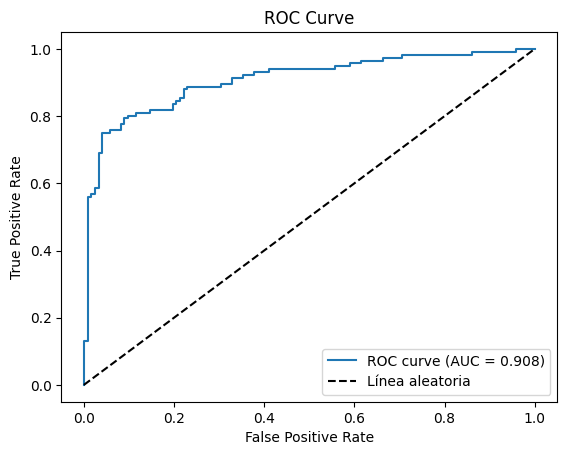

In [210]:
shows_roc_curve(y_test, y_prob_best_gradientboost_clf)

In [196]:
# Grilla XGBClassifier

grid_xgb_clf = GridSearchCV(
    estimator= xgb_clf,
    param_grid= param_grid_xgb_clf,
    scoring= "f1",
    n_jobs=-1,
    verbose=0
)

# Entrenar grilla.
grid_xgb_clf.fit(X_train, y_train)

# Mejor Estimador y Parametros
best_xgb_clf = grid_xgb_clf.best_estimator_
best_params_xgb_clf = grid_xgb_clf.best_params_

# Predecir
y_pred_best_xgb_clf = best_xgb_clf.predict(X_test)
y_prob_best_xgb_clf = best_xgb_clf.predict_proba(X_test)[:, 1]  # probabilidad de la clase positiva

In [199]:
# Guardando Modelo para posibles usos futuros en archivos .joblib
dump(best_xgb_clf, 'best_xgb_clf.joblib')

['best_xgb_clf.joblib']

In [202]:
# Mejores parametros
print("Mejores parámetros:", best_params_xgb_clf)

Mejores parámetros: {'learning_rate': 0.0289, 'n_estimators': 92, 'subsample': 0.4}


In [215]:
# Importancia de características según modelo: best_xgb_clf

importances_best_xgb_clf = pd.Series(best_xgb_clf.feature_importances_, index=X.columns)
sorted_importances_best_xgb_clf = importances_best_xgb_clf.sort_values(ascending=False)
print("\nImportancia de Features según modelo: best_xgb_clf")
print(sorted_importances_best_xgb_clf)


Importancia de Features según modelo: best_xgb_clf
cp_4.0         0.269971
exang          0.148153
sex            0.087661
oldpeak        0.065373
chol           0.064865
thalach        0.043904
cp_2.0         0.043052
restecg_1.0    0.040602
threstbps      0.039411
age            0.039297
cp_1.0         0.036434
restecg_0.0    0.035584
restecg_2.0    0.034819
fbs            0.029533
cp_3.0         0.021341
dtype: float32


In [205]:
# Evaluacion de desempeño con los datos de predicción
df_results_best_xgb_clf = model_evaluation_classifier(y_test, y_pred_best_xgb_clf, y_prob_best_xgb_clf,"model_best_xgb_clf")
df_results_best_xgb_clf

,Accuracy,Precision,Recall,F1 Score,AUC
Model,,,,,
model_best_xgb_clf,0.840336,0.825,0.853448,0.838983,0.924392


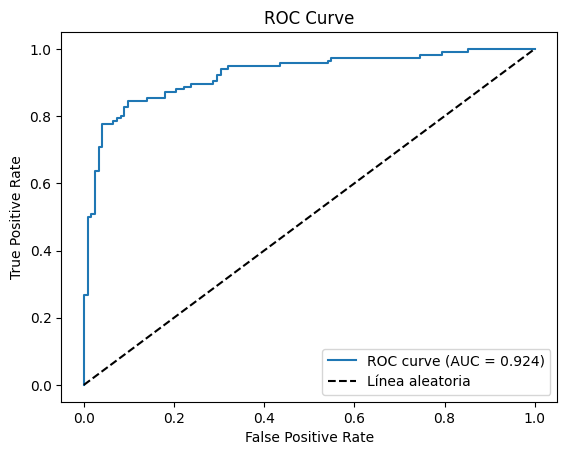

In [211]:
shows_roc_curve(y_test, y_prob_best_xgb_clf)

In [206]:
df_results_boost_best = pd.concat([df_results_best_adaboost_clf, df_results_best_gradientboost_clf, df_results_best_xgb_clf])
df_results_boost_best

,Accuracy,Precision,Recall,F1 Score,AUC
Model,,,,,
model_best_adaboost_clf,0.857143,0.853448,0.853448,0.853448,0.927749
model_best_gradientboost_clf,0.810924,0.798319,0.818966,0.808511,0.907999
model_best_xgb_clf,0.840336,0.825000,0.853448,0.838983,0.924392


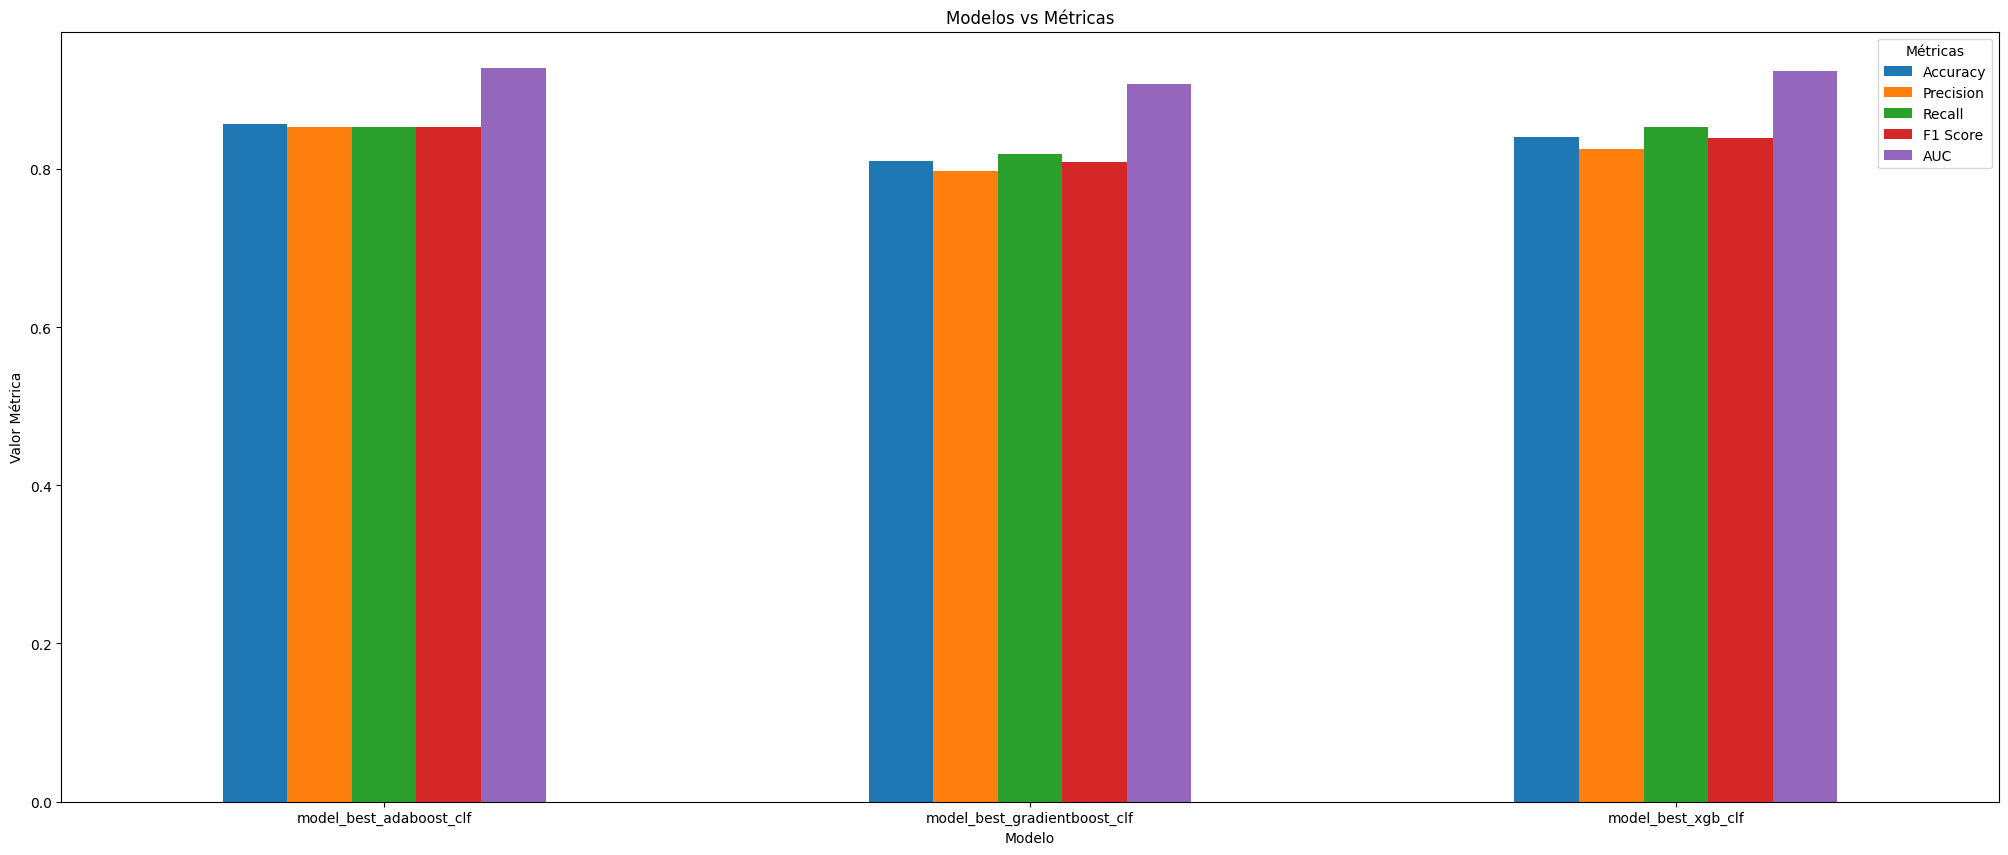

In [208]:
show_metrics_models(df_results_boost_best)

In [221]:
# Cada Modelo tiene sus características positivas, pero en términos generales AdaBoost presenta mejores métricas para este dataset
# lo que puede deberse a que no se han modificado suficientes hiperparámetros en los modelos GradientBoost y XGDBoost que ayudarían a aprovechar sus ventajas.
# El valor AUC del modelo AdaBoost presenta el valor más alto, sin embargo, presenta en su forma algunas irregularidades que pudieran deberse a:
#       - Dataset pequeño o con baja resolución
#       - Modelo poco estable o poco calibrado
#       - Modelo con overfitting a ciertos patrones

# Entrenaremos nuevamente el modelo AdaBoost con los mejores parámetros encontrados, ya que para el presente ejemplo presentó mejores métricas

# AdaBoostClassifier

# Modelo AdaBoostClassifier optimizado
new_adaboost_clf = AdaBoostClassifier( learning_rate=0.3028, n_estimators=116, random_state=42)

# Entrenamiento
new_adaboost_clf.fit(X_train, y_train)

# Predicción
y_pred_new_adaboost_clf = new_adaboost_clf.predict(X_test)
y_prob_new_adaboost_clf = new_adaboost_clf.predict_proba(X_test)[:, 1] # probabilidad de la clase positiva

# Evaluacion de desempeño con los datos de predicción
df_results_new_adaboost_clf = model_evaluation_classifier(y_test, y_pred_new_adaboost_clf, y_prob_new_adaboost_clf,"model_new_adaboost_clf")
df_results_new_adaboost_clf

,Accuracy,Precision,Recall,F1 Score,AUC
Model,,,,,
model_new_adaboost_clf,0.857143,0.853448,0.853448,0.853448,0.927749


In [222]:
# Importancia de características según modelo: new_adaboost_clf

importances_new_adaboost_clf = pd.Series(new_adaboost_clf.feature_importances_, index=X.columns)
sorted_importances_new_adaboost_clf = importances_new_adaboost_clf.sort_values(ascending=False)
print("\nImportancia de Features según modelo: new_adaboost_clf")
print(sorted_importances_new_adaboost_clf)


Importancia de Features según modelo: new_adaboost_clf
thalach        0.332616
chol           0.218717
cp_4.0         0.123856
oldpeak        0.107445
sex            0.088234
exang          0.075791
age            0.034682
cp_2.0         0.010381
threstbps      0.008275
fbs            0.000000
cp_1.0         0.000000
cp_3.0         0.000000
restecg_0.0    0.000000
restecg_1.0    0.000000
restecg_2.0    0.000000
dtype: float64


In [223]:
# Según el modelo que presentó las mejores métricas, AdaBoost, las variables más influyentes en la predicción de una cardiopatía son las siguientes:

# thalach: Frecuencia cardiaca máxima alcanzada
# chol: Colesterol sérico en mg/dl
# oldpeak: Depresión del ST inducida por el ejercicio en relación con el reposo
# sex: Sexo
# exang: Angina inducida por ejercicio
# age: Edad del sujeto en años
# cp: Tipo de dolor torácico: angina atípica, asintomático
# trestbps: Presión arterial en reposo (en mm Hg al ingreso en el hospital)

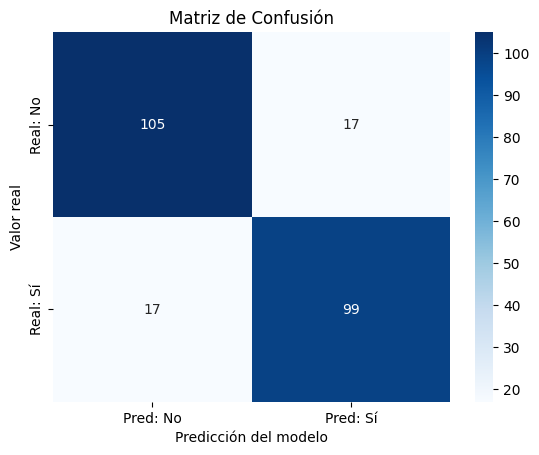

Descripción Matriz de Confusión
---------------------------------
Falsos Positivos: 17
Falsos Negativos: 17
Verdaderos Positivos: 99
Verdaderos Negativos: 105


In [217]:
shows_confusion_matrix(y_test, y_pred_new_adaboost_clf)

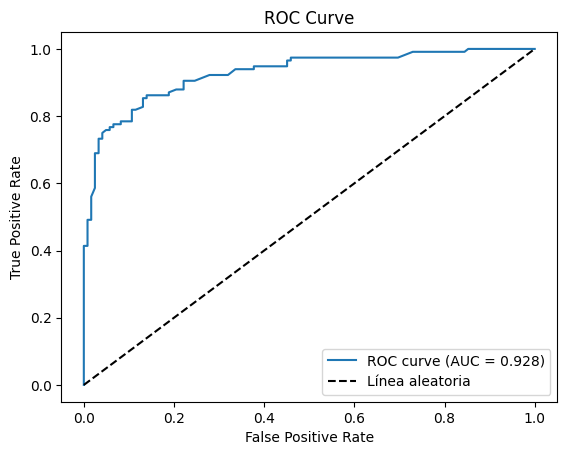

In [218]:
shows_roc_curve(y_test, y_prob_new_adaboost_clf)